In [2]:
import os 
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as im
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
os.listdir('cell_images')

['Parasitized', 'Uninfected']

In [4]:
Parasitized_cell=os.listdir('cell_images/Parasitized/')
print("Parasitized cell:-", len(Parasitized_cell))

Uninfected_cell =os.listdir('cell_images/Uninfected/')
print("Uninfected cell:-", len(Uninfected_cell))

Parasitized cell:- 13780
Uninfected cell:- 13780


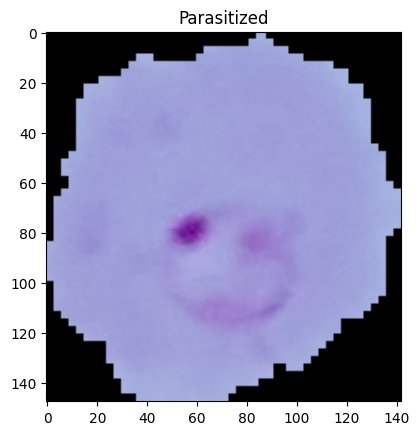

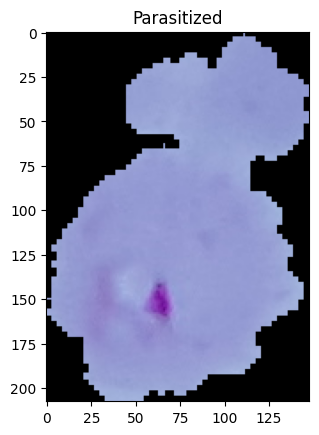

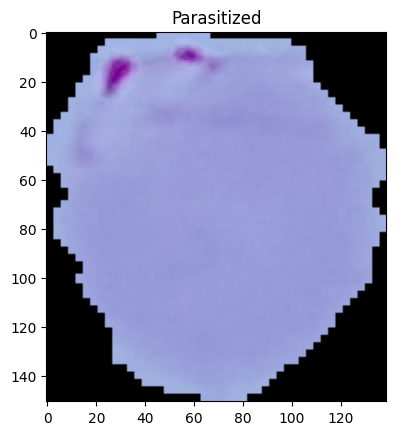

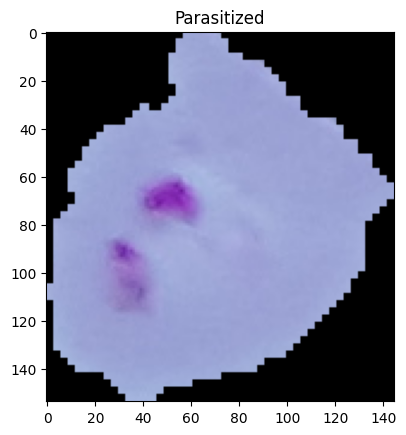

In [5]:
#plt.figure(figsize = (10,10))
for i in range(4):
    #plt.subplot(1,4, i+1)
    img = cv2.imread('cell_images/Parasitized/' + Parasitized_cell[i])
    plt.imshow(img)
    plt.title("Parasitized")
    plt.show()

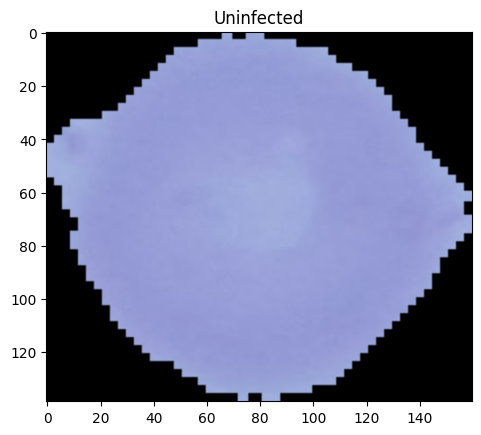

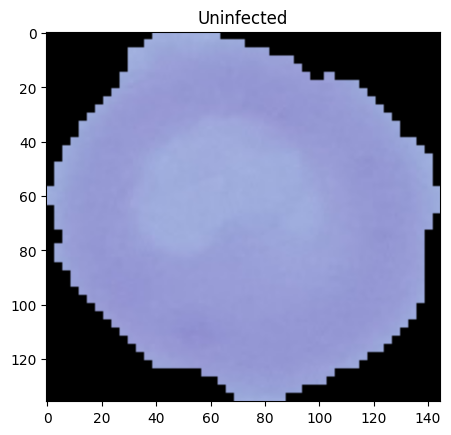

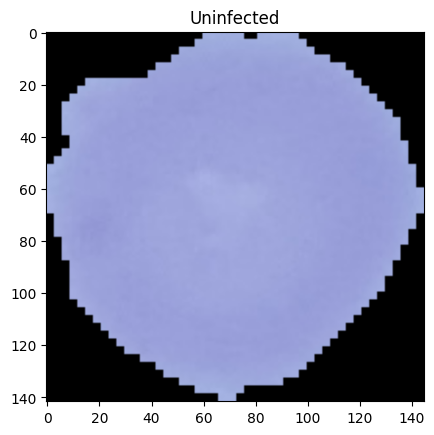

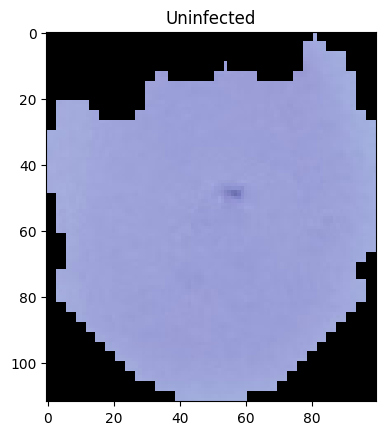

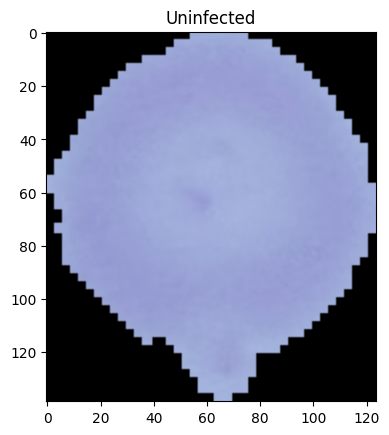

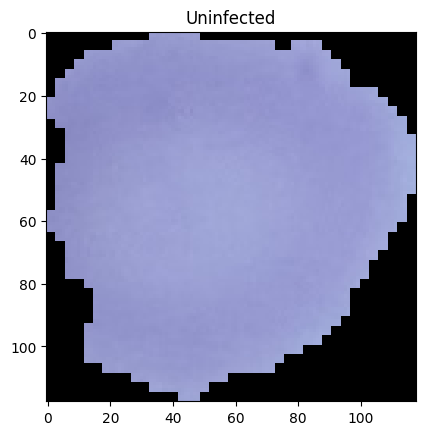

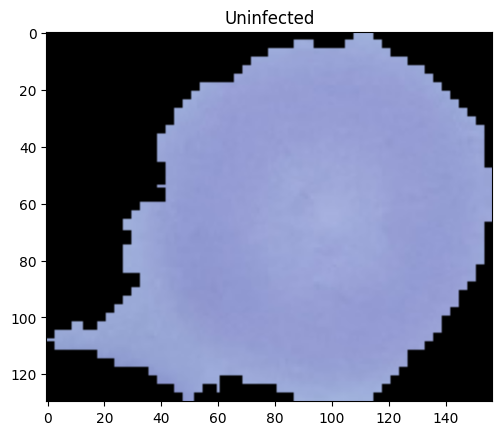

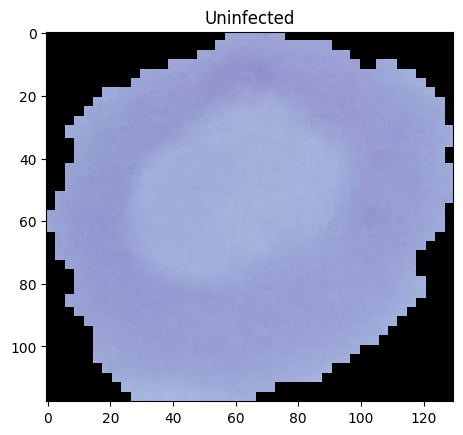

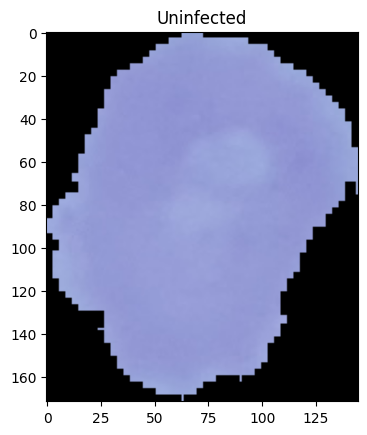

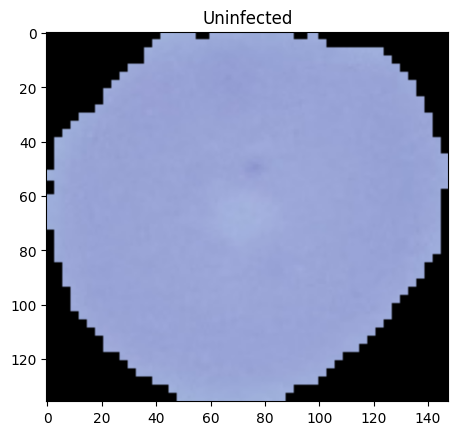

In [6]:
for i in range(10):
    img = cv2.imread('cell_images/Uninfected/' + Uninfected_cell[i])
    plt.imshow(img)
    plt.title('Uninfected')
    plt.show()

In [7]:
#Resizing the cell images
width = 68
height = 68

In [8]:
#Splitting Dataset
datagen = ImageDataGenerator(rescale = 1/255.0, validation_split= 0.2)
datagen

In [9]:
#Preparing Train and Test data Generator
trainDatagen = datagen.flow_from_directory(directory='cell_images/',target_size=(width,height),class_mode = 'binary',batch_size =20, subset='training')


Found 22048 images belonging to 2 classes.


In [10]:
trainDatagen.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [11]:
valDatagen = datagen.flow_from_directory(directory='cell_images/',target_size=(width,height),class_mode = 'binary',batch_size =20, subset='validation')


Found 5510 images belonging to 2 classes.


In [12]:
#Creating CNN Model 


model = Sequential()
model.add(Conv2D(16, (3,3), activation= 'relu', input_shape= (width, height, 3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 66, 66, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 33, 33, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 33, 33, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 15, 15, 64)        0

In [14]:
model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
history = model.fit_generator(generator = trainDatagen, steps_per_epoch = len(trainDatagen), epochs =5, validation_data = valDatagen, validation_steps = len(valDatagen))

C:\Users\Ashminder SinghVirdi\AppData\Local\Temp\ipykernel_6576\55890174.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator = trainDatagen, steps_per_epoch = len(trainDatagen), epochs =5, validation_data = valDatagen, validation_steps = len(valDatagen))


Epoch 1/5
1103/1103 [==============================] - 1531s 1s/step - loss: 0.5390 - accuracy: 0.7310 - val_loss: 0.3658 - val_accuracy: 0.9154
Epoch 2/5
1103/1103 [==============================] - 896s 812ms/step - loss: 0.2499 - accuracy: 0.9218 - val_loss: 0.2064 - val_accuracy: 0.9347
Epoch 3/5
1103/1103 [==============================] - 224s 203ms/step - loss: 0.2059 - accuracy: 0.9372 - val_loss: 0.1819 - val_accuracy: 0.9318
Epoch 4/5
1103/1103 [==============================] - 172s 156ms/step - loss: 0.1850 - accuracy: 0.9446 - val_loss: 0.1718 - val_accuracy: 0.9417
Epoch 5/5
1103/1103 [==============================] - 196s 177ms/step - loss: 0.1717 - accuracy: 0.9476 - val_loss: 0.1667 - val_accuracy: 0.9426


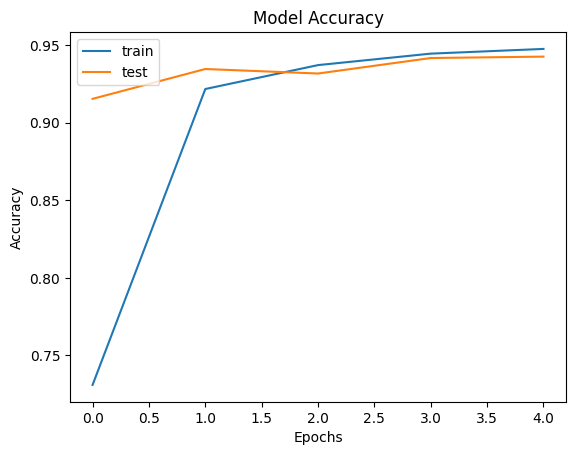

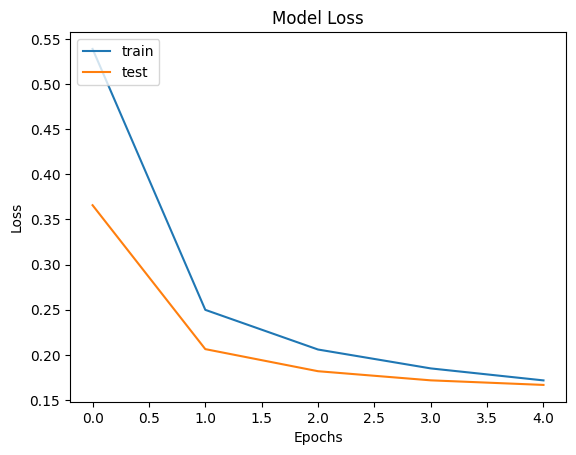

In [17]:
#Plotting Accuracy of our Model


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc ='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [ ]:
history_dict = history.history
history_dict.keys()

1/1 [==============================] - 2s 2s/step


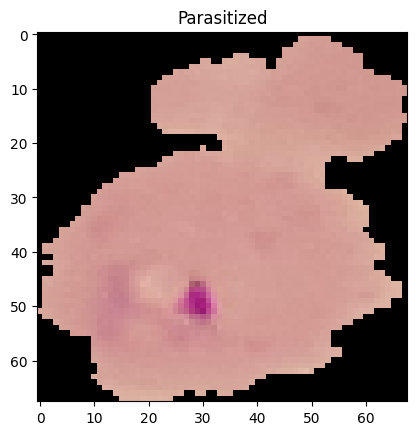

In [18]:
#Testing our model 

testing_path = 'cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png'
img = tf.keras.utils.load_img(testing_path, target_size = (68,68))
plt.imshow(img)


x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis = 0)

images = np.vstack([x])
val = model.predict(images)
if val == 0:
    plt.title('Parasitized')
else:
    plt.title('Uninfected')